Name Luz Ballesteros Gonzalez 

Labpartner(s): Paola Granados 

In [7]:
#import statements go here
import numpy as np 
import xarray as xr 
import pandas as pd 

# Class 11.1

#### Announcements

- Reminder **all labs through Lab 9.2 need to have a satisfactory grade (no zeros) by end of the day 4/1 to pass the class.** The last drop date is 4/6. The mastery of this beginning material is needed to complete this course. This includes the functions exercise and the expected grade assignment.

- We are going to do an advanced lab today. For those of you struggling to catch up, you can not worry about this one and focus on previous labs. See syllabus for grading policy.
 
- Lab on Wed will be light on programming, as you have final research proposals this week. More on this on Wednesday, and you will have the oppertunity to work on them in the lab period then. See research proposal assignment on github

# Warmups 11.1

For warmups today you will share your plot animations.

# Lecture 11.1

### Agenda:
- Predator prey modeling. 

## Predator Prey Modeling

See original here: 

https://github.com/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb

For a more advanced example in predator prey modeling:

https://waterprogramming.wordpress.com/tag/predator-prey/

Modeling the zombie aplocalypse:

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html



###  Lotka-Volterra Equations

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential
equations. They are frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and
the other as prey. You can read more about this from Wikipedia <http://en.wikipedia.org/wiki/Lotka-Volterra_equation>.

### Equations describing the system

 Their populations change with time according to the following pair of equations:

$ dx/dt = x ( \alpha - \beta y  ) $

$ dy/dt = -y( \gamma - \delta x ) $

Where, $x$ is the number of prey (e.g., phytoplankton), $y$ is the number of predators (e.g., zooplankton). $dx/dt, dy/dt$ gives the rate of change of their respective populations over 
time $t$. $\alpha, \beta, \gamma, \delta $ are the parameters describing the interaction between the two species. This models makes some assumptions about 
the predator and prey. You can read about them from the Wikipedia page mentioned above.

The above equations can be written in a slightly different form to interpret the physical meaning of the four parameters used.

1.Rate equation for prey

$dx/dt = \alpha x - \beta x y $

The prey population (x) is presumed to have unlimited supply of food, $\alpha x$ represents the rate of population growth of prey. Rate of decrease of population of prey is assumed to be proportional to the rate at which predator and prey encounter each other, given by $ \beta y x$

2.Rate equation for predator

$ dy/dt = \delta x y -\gamma y $

For the predator population (y), $\delta x y $ gives the rate of growth of predator population. Note that this is similar to the rate of decrease of population of prey. The second term $\gamma y $ gives the rate of population decrease for predators due to natural death or emigration.

### Numerical solution using Python

A simple python code for solving these equations is shown below.

In [8]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# set the initial parameters
alpha = 1. #prey rate 
beta = 1.2
gamma = 4.
delta = 1.

In [10]:
#define the time stepping scheme - Euler forward or "shooting" method

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [11]:
# define the function that represents the Lotka-Volterra equations

def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])


In [12]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial preditor  amount 
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    

In [13]:
u_euler

array([[10.        ,  2.        ],
       [ 9.86      ,  2.12      ],
       [ 9.7077616 ,  2.244232  ],
       ...,
       [ 0.87954346,  0.04493602],
       [ 0.88786462,  0.04353381],
       [ 0.89627944,  0.04217898]])

We will now plot the variation of population for each species with time.

In [14]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

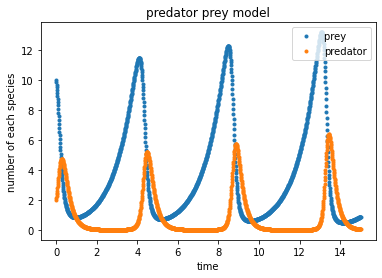

In [15]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

## System behavior

A better understanding of the system behavior can be obtained by a phase plot of the population of predators vs. the population of prey. It will tell us if the system sustains or collapses over time. For the choice of parameters $ \alpha, \beta, \gamma $ and $ \delta $ made above, we see that the maximum population of each species keeps increasing each cycle. You can read more about that in the Wikipedia link mentioned above.

In [16]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")


SyntaxError: invalid syntax (<ipython-input-16-3355f04df274>, line 8)

Text(0.5, 1.0, 'predator prey model')

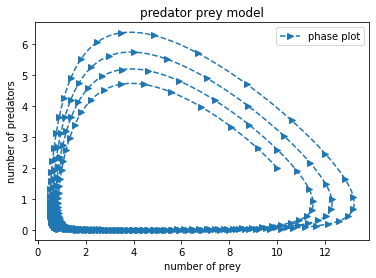

In [17]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

# Lab 11.1

## E.1 How does timestep affect the solution?
Modify the timestep (or time increment) dt. How does this affect your solutions? Plot both the timeseries and the phase plots. Try making dt 10 times bigger (dt = 0.1) and 10 times smaller. Describe what happens to your results. What happens if you make dt 100 times smaller?

#changing the time step dt to dt=0.1 

It changes the rate at which the prey increases so if it's 

In [14]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.1                         # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial preditor  amount 
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    

In [15]:
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

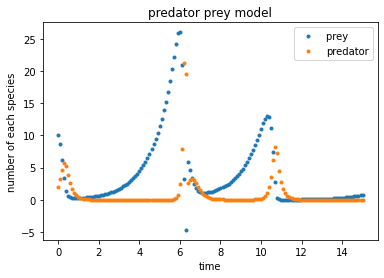

In [16]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

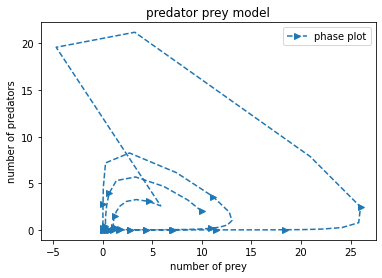

In [17]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [ ]:
# The larger the time increment gets the less point there are making the model less precise due to the fewer points. 

Changing the dt to dt=.01

In [18]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = .01                       # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial preditor  amount 
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [19]:
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

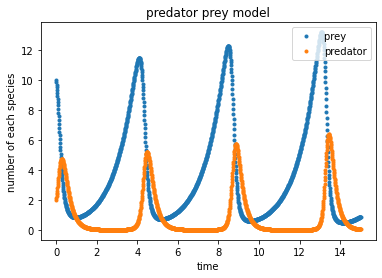

In [20]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

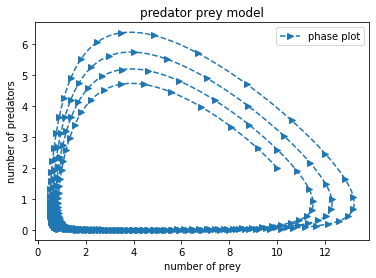

In [21]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Changing dt to be 100 times smalles dt=.001

In [22]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = .001                       # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial preditor  amount 
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [23]:
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

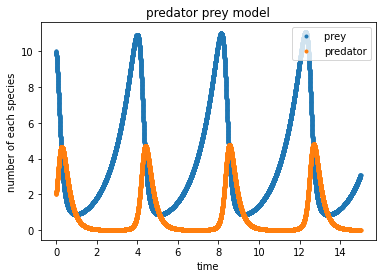

In [24]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

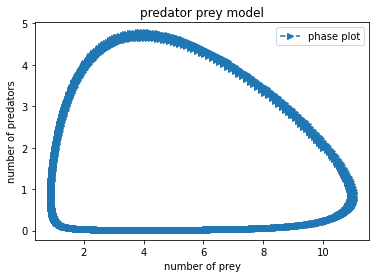

In [25]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [ ]:
# this follows the opposite so the smaller the time increment gets the more point the model will have, which in turn will have more precision. 

## E.2 Adding the steady state

The steady state(s) of the system are found by setting the population equations to zero, that is the solution to when the population is not changing. This is also called a "fixed point" of the equations, since if the populations start there they stay there, i.e. are fixed.

Find the steady states of the system. Plot the fixed point (steady state population) of the system on both the timeseries and phase space plots. Describe where the fixed point is in the phase space plot. What happens if you start at the steady state? What happens if you start near the steady state?

In [26]:
# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [27]:
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

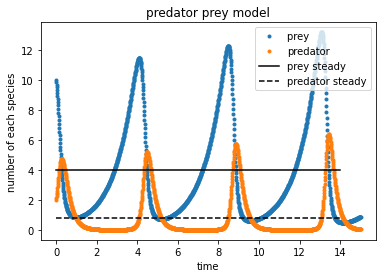

In [28]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.plot([0,14],[4,4], label = "prey steady", color="k")
plt.plot([0,14],[0.83,0.83], label = "predator steady",color="k",linestyle="--")
#plots the steady state lines 
plt.legend(loc='upper right')


#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Based on the graph you can see that the steady states are :
Prey : 4
Predator: about 1


Text(0.5, 1.0, 'predator prey model')

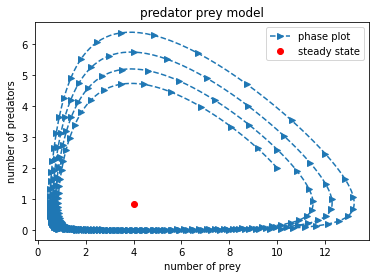

In [29]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.83,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Here you can see that the steady state is x=4 and y=.8333 or close to 1

START AT THE STEADY STATE 

In [34]:
# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 4. #initial prey 
y0 = .83 #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

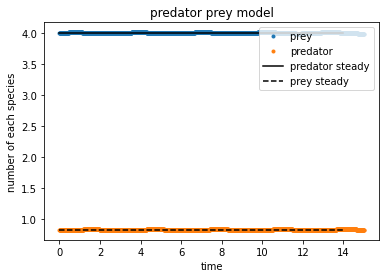

In [35]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.plot([0,14],[4,4], label = "predator steady", color="k")
plt.plot([0,14],[0.83,0.83], label = "prey steady",color="k",linestyle="--")
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

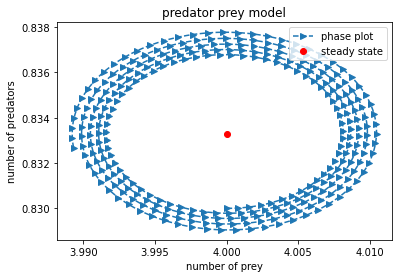

In [36]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.8333,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

When starting at the steady state you can see that there is no change in the population levels, they look like straight lines. 

STARTING CLOSE TO THE STEADY STATE SO Y0=1

In [37]:
# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 4. #initial prey 
y0 = 1. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

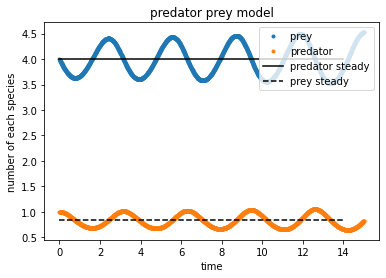

In [38]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.plot([0,14],[4,4], label = "predator steady", color="k")
plt.plot([0,14],[0.83,0.83], label = "prey steady",color="k",linestyle="--")
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

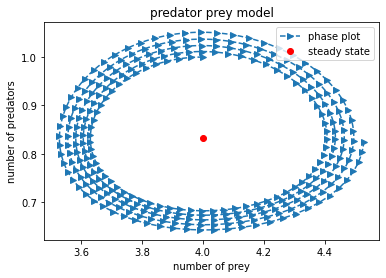

In [39]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.8333,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

When plotting close to the steady state you can see the populations levels varaiate. 

## Another time stepping method with higher order of accuracy

## E.3 A better algorithm
Do Exercise 1 again with a fourth order time stepping method called "Runge-Kutta 4" whose algorithm is given below. Do your answers differ?

In [5]:
import numpy as np

In [18]:
def RK4(u,f,dt):
    # Runge Kutta 4th order method
  

    #calculate slopes
    
    k1 = f(u)
    u1 = u + (dt/2.)*k1
    k2 = f(u1)
    u2 = u + (dt/2.)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6.)*(k1 + 2.*k2 + 2.*k3 + k4)

Runge Kutta 4th with dt=0.1

In [20]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = .1                       # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial preditor  amount 
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)
 ## add this to run on GE KUTTA   
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

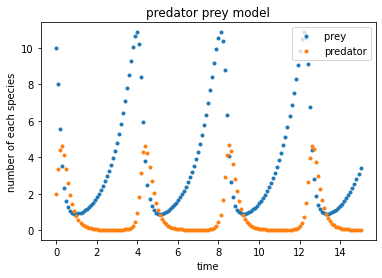

In [21]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

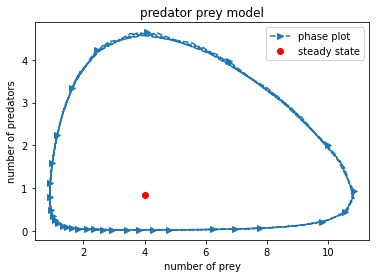

In [22]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.83,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Making the dt 100 times smaller dt=.001

In [25]:
T  = 15.0  #how long we want to run it for     # final time
dt = 0.001                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt) 
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

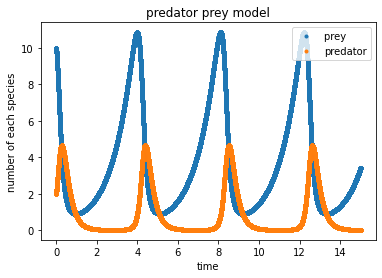

In [24]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

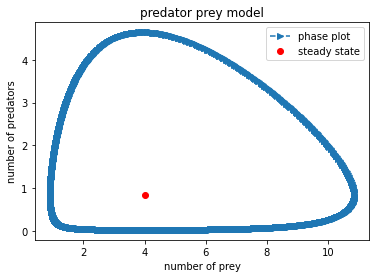

In [26]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.83,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [ ]:
## For dt=.1 I can see how the Runge-Kutta 4 plots more points and seems to be a more visible trend. However with the dt=.001 I don't see a a major difference. Maybe I did it wrong ? 

## E.4 Exploring parameter space
Vary the interactions between species by changing $\alpha, \beta, \gamma, \delta$ and see what happens to the population evolution as well as phase plots. How does changing each parameter individually affect the system?

In [52]:
# set the initial parameters, changing alpha from 1 to 2.5
alpha = 2.5
beta = 1.2
gamma = 4.
delta = 1.

# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt) 
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

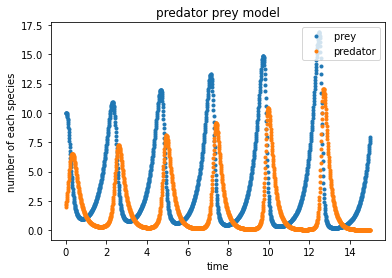

In [53]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

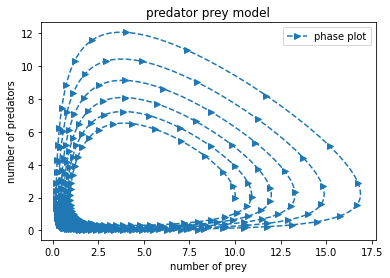

In [54]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Changing the alpha to a bigger number increases the population growth rate of the prey. This then displays a positive feedback loop, increases in prey increases predator, since technically there would be more food to eat. 

In [55]:
# set the initial parameters, changing beta from 1.2 to 2
alpha = 2.5
beta = 2
gamma = 4.
delta = 1.

# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt) 
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

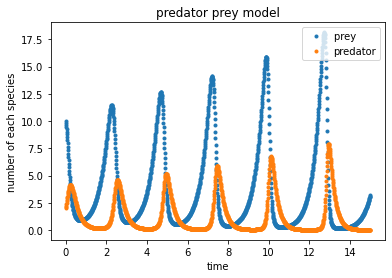

In [56]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

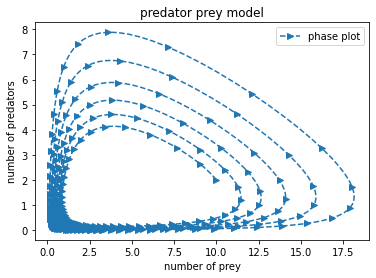

In [57]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Increasing Beta decreases the population of predators. 

In [58]:
# set the initial parameters, changing gama from 4 to 7
alpha = 2.5
beta = 2
gamma = 7.
delta = 1.

# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt) 
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

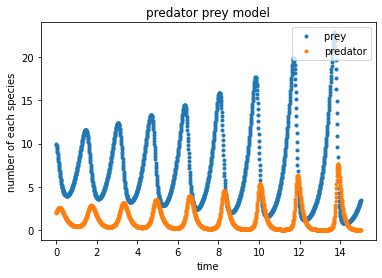

In [59]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

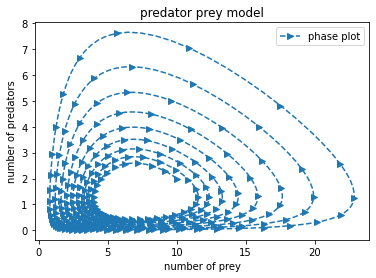

In [60]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Increasing Gamma increases the number of cycles will go through in a set period of time. Gamma controls the death/pop decrease of predators, if it increases then will increase how often predators die

In [64]:
# set the initial parameters, changing delta from 1 to 1.9
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.9

# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt) 
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

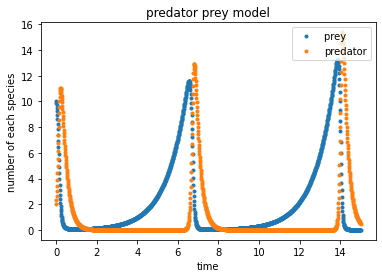

In [65]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

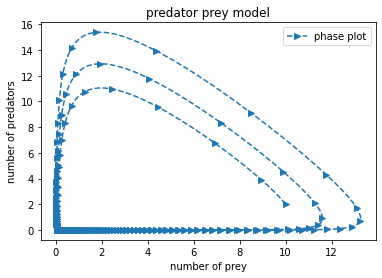

In [66]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Increasing the delta seems to increase the population of predators 

## E.5 (Advanced)
Modify the differential equations to include other types of interactions. See advanced predator prey example link at the top for ideas. You might add in a self-eating (i.e. $-ay^2$) term into the predator equation. Or do the zombie apocalypse example

In [68]:
from scipy.integrate import odeint
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

In [69]:
P = 0      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)


In [70]:
# solve the system dy/dt = f(y, t)
def f(y, t):
     Si = y[0]
     Zi = y[1]
     Ri = y[2]
     # the model equations (see Munz et al. 2009)
     f0 = P - B*Si*Zi - d*Si
     f1 = B*Si*Zi + G*Ri - A*Si*Zi
     f2 = d*Si + A*Si*Zi - G*Ri
     return [f0, f1, f2]

In [71]:
# initial conditions
S0 = 500.              # initial population
Z0 = 0                 # initial zombie population
R0 = 0                 # initial death population
y0 = [S0, Z0, R0]     # initial condition vector
t  = np.linspace(0, 5., 1000)   

In [72]:
# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

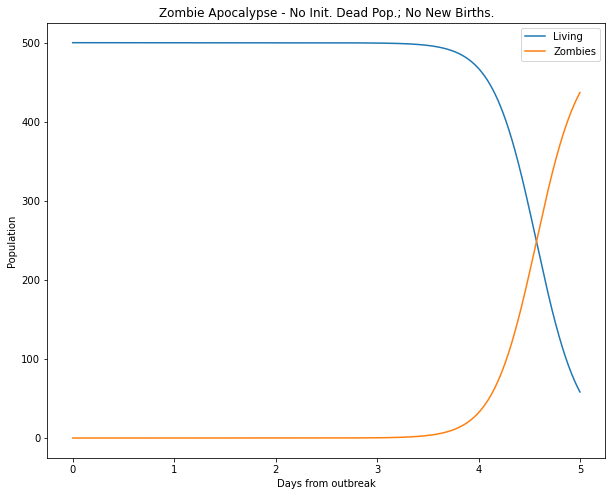

In [73]:
# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

In [79]:
# change the initial conditions
R0 = 0.02*S0   # 2% of initial pop is dead
y0 = [S0, Z0, R0]


In [80]:
# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

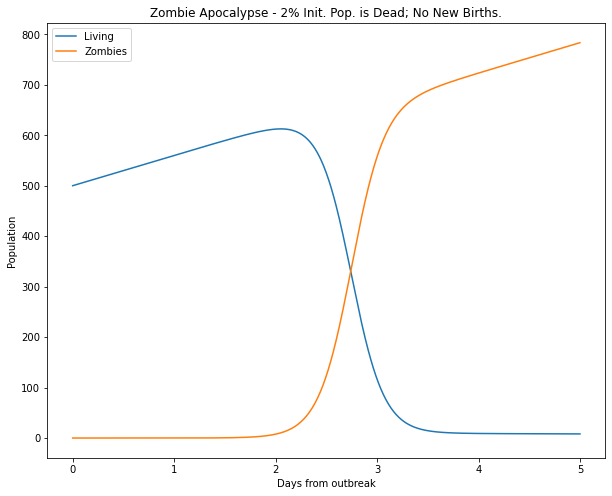

In [87]:
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 2% Init. Pop. is Dead; No New Births.')
plt.legend(loc=0)


In [85]:
#CHANGING THE CONDITION AND ADDING 20 NEW BIRTHS 
R0 = 0.02*S0   # 2% of initial pop is dead
P  = 60        # 60 new births daily
y0 = [S0, Z0, R0]

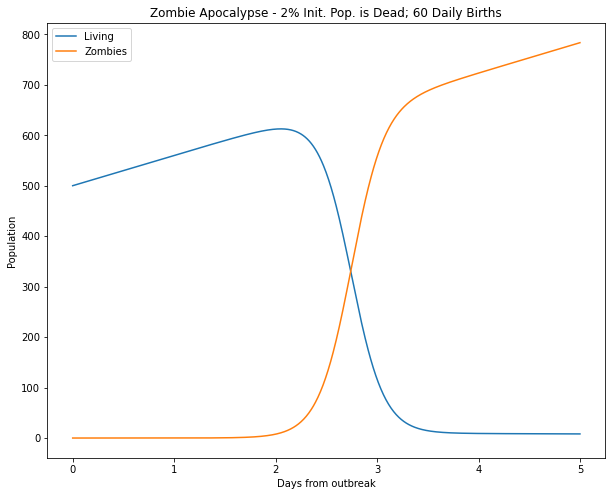

In [86]:
# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 2% Init. Pop. is Dead; 60 Daily Births')
plt.legend(loc=0)